In [1]:
import pandas as pd
import numpy as np

In [5]:
df_train = pd.read_csv("D:\\datapool\\cs-training.csv")

x = df_train.drop([u'Unnamed: 0', u'SeriousDlqin2yrs'] , axis = 1)
y_column = u'SeriousDlqin2yrs'
y = df_train[u'SeriousDlqin2yrs']

In [50]:
x["test_cat1"] = pd.Series(np.random.randint(0,5,size=150000)).apply(lambda x:str(x)+"_test")
x["test_cat2"] = pd.Series(np.random.randint(0,10,size=150000)).apply(lambda x:str(x)+"_test")
x["test_cat3"] = pd.Series(np.random.randint(0,20,size=150000)).apply(lambda x:str(x)+"_test")
x["test_U"] = y
x.loc[x["test_cat1"] == "0_test","test_cat1"] = np.nan
x.loc[x["test_cat2"] == "0_test","test_cat2"] = np.nan
x.loc[x["test_cat3"] == "0_test","test_cat3"] = np.nan

#x["test_cat1"].value_counts()

#print np.random.randint.__doc__

In [75]:
%run D:\gitstore\fy_scorecard.py

ximu = fs_scorecard(x,y,event = 1,workpath = "./")

#ximu.get_woe_iv()

ximu.columns_bin_dict["NumberOfTime30-59DaysPastDueNotWorse"] = [-np.inf,0,np.inf]
ximu.columns_bin_dict["NumberOfTime60-89DaysPastDueNotWorse"] = [-np.inf,0,np.inf]
ximu.columns_bin_dict["NumberOfTimes90DaysLate"] = [-np.inf,0,np.inf]

ximu.get_woe_iv()

ximu.woe_t.head()

FY Scorecard ready!
test_cat3 : too many values for discrete variables.


<string>:82: RuntimeWarning: divide by zero encountered in log


./woe_t.xlsx  generated;
 <name>.woe_t, <name>.iv_t available


,var_name,var_cat,cat_total_count,pos_count,neg_count,p_ni,p_y_total,p_yi,woe,iv_i
0,RevolvingUtilizationOfUnsecuredLines,"(-inf, 0.0192]",30000,582,29418,0.210168,0.06684,0.058049,-1.286617,1.957182e-01
1,RevolvingUtilizationOfUnsecuredLines,"(0.0192, 0.0832]",30000,497,29503,0.210775,0.06684,0.049571,-1.447382,2.333234e-01
2,RevolvingUtilizationOfUnsecuredLines,"(0.0832, 0.271]",30000,877,29123,0.208060,0.06684,0.087473,-0.866502,1.044893e-01
3,RevolvingUtilizationOfUnsecuredLines,"(0.271, 0.699]",30000,2107,27893,0.199273,0.06684,0.210154,0.053164,5.784748e-04
4,RevolvingUtilizationOfUnsecuredLines,"(0.699, inf]",30000,5963,24037,0.171725,0.06684,0.594754,1.242254,5.255095e-01
0,age,"(-inf, 39.0]",32004,3370,28634,0.204567,0.06684,0.336126,0.496593,6.533152e-02
1,age,"(39.0, 48.0]",30540,2565,27975,0.199859,0.06684,0.255835,0.246922,1.382179e-02
2,age,"(48.0, 56.0]",29040,2077,26963,0.192629,0.06684,0.207161,0.072734,1.057024e-03
3,age,"(56.0, 65.0]",29817,1324,28493,0.203559,0.06684,0.132057,-0.432726,3.094103e-02
4,age,"(65.0, inf]",28599,690,27909,0.199387,0.06684,0.068821,-1.063738,1.388880e-01


In [76]:
ximu.get_woe_replaced_df()

<name>.df_woe_replaced, <name>.df_binned available


In [80]:
ximu.df_woe_replaced.head()

,test_cat1,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,age,DebtRatio,NumberOfDependents,MonthlyIncome,test_U,RevolvingUtilizationOfUnsecuredLines,test_cat2,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
0,0.003935,-0.002550,0.253629,0.246922,0.425358,0.209307,-0.417709,10.0,1.242254,0.029494,1.298427,-0.288208,-0.389724
1,-0.015992,0.349083,0.024285,0.246922,-0.097667,-0.078749,0.332066,-10.0,1.242254,-0.041152,-0.541721,-0.288208,-0.389724
2,0.003935,0.349083,0.024285,0.496593,-0.097667,-0.078749,0.272204,-10.0,0.053164,0.042879,1.298427,-0.288208,2.298734
3,0.034412,-0.128496,0.024285,0.496593,-0.097667,-0.078749,0.272204,-10.0,-0.866502,0.029494,-0.541721,-0.288208,-0.389724
4,-0.015992,-0.221596,0.024285,0.072734,-0.097667,-0.078749,-0.417709,-10.0,1.242254,-0.025096,1.298427,-0.288208,-0.389724


In [84]:
x_model = ximu.df_woe_replaced.drop(["test_cat1","test_cat2","test_U"],axis=1)
y_model = y

In [86]:
import statsmodels.api as sm

model = sm.Logit(endog=y_model , exog=x_model)
result = model.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.449799
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               150000
Model:                          Logit   Df Residuals:                   149990
Method:                           MLE   Df Model:                            9
Date:                Wed, 06 Sep 2017   Pseudo R-squ.:                 -0.8330
Time:                        14:04:17   Log-Likelihood:                -67470.
converged:                       True   LL-Null:                       -36808.
                                        LLR p-value:                     1.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
NumberOfOpenCreditLinesAndLoans          0.1308      0.0

In [98]:
predict_true = pd.DataFrame()
predict_true["true"] = y_model
predict_true["predict"] = result.fittedvalues
predict_true.head()

import sklearn.metrics as skmetric

fpr ,tpr ,thresholds = skmetric.roc_curve(predict_true["true"],predict_true["predict"])
auc =  skmetric.auc(fpr, tpr)

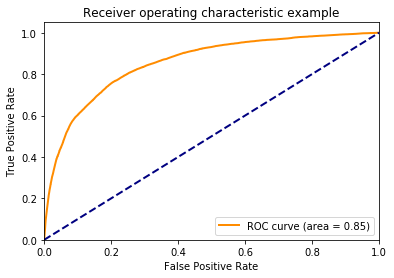

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()